In [362]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas.plotting as scatter_matrix 
import ast
from wordcloud import WordCloud, STOPWORDS 
import pygal
from PIL import Image
import matplotlib.pyplot as plt
import operator

In [2]:
data_main= pd.read_csv(r"C:\Users\diyas\Documents\Recommendation_system\combinedFinalMasterDataset_updatedSoftwareTools.csv") 

In [3]:
data_main.columns

Index(['Unnamed: 0', 'USN', '10thPercentage', '12thPercentage', 'AwardsNLP',
       'Branch', 'CGPA', 'CTC', 'CoCurricularActivities', 'CompanyNameNLP',
       'CoreCourseGrade', 'CoreCourseName', 'CourseGrade', 'CourseName',
       'ElectiveCourseGrade', 'ElectiveCourseName', 'EmploymentType',
       'ExternalCertificatesDomain', 'ExternalCertificatesKey',
       'GeneralSkills', 'GitHubLink', 'InternshipCompany',
       'InternshipProjectDomain', 'LanguagesNLP', 'LinkedInLink',
       'MinorAttended', 'Name', 'NoofInternships', 'NoofProjects',
       'NumberOfOffers', 'OtherDetails', 'ProgLanguages',
       'ProjectDetailDomain', 'PublicationNLP', 'ResearchDomain',
       'ScholarshipsNLP', 'SoftwareTools', 'Stipend(K)', 'TierLevel',
       'VolunteeringWork', 'WorkshopsDomain', 'WorkshopsOrg'],
      dtype='object')

In [5]:
class EDAPreProcessing:
    def __init__(self, masterData):
        self.masterData = masterData
        
    def boxplotCGPA(self,df):
        temp=df.drop(columns=['Unnamed: 0', 'Name', 'USN'])
        return temp

In [91]:
class BasicAttributeWiseEDA:
    def __init__(self, masterData):
        self.masterData = masterData
    
    def boxplotCGPA(self,df):
        print("BOXPLOT FOR CGPA")
        path2 = pd.DataFrame(df.CGPA) 
        ax = path2.plot.box() 
        plt.show() 
        mean=np.mean(df["CGPA"])
        print("Overall CGPA MEAN",mean)
        print("\n \n")
        
    def histCTC(self,df):
        print("HISTOGRAM FOR CTC")
        df["CTC"] = df["CTC"].fillna(0).astype(int)
        print(df.hist(column=["CTC"]))
        print("\n \n")
        
    def hist10th(self,df):
        print("HISTOGRAM FOR 10th")
        df["10thPercentage"] = df["10thPercentage"].fillna(0).astype(int)
        print(df.hist(column=["10thPercentage"]))
        print("\n \n")
        
    def hist12th(self,df):
        print("HISTOGRAM FOR 12th")
        df["12thPercentage"] = df["12thPercentage"].fillna(0).astype(int)
        print(df.hist(column=["12thPercentage"]))
        print("\n \n")
        
    def histCGPA(self,df):
        print("HISTOGRAM FOR CGPA")
        df["CGPA"] = df["CGPA"].fillna(0).astype(int)
        print(df.hist(column=["CGPA"]))
        print("\n \n")
        
    def wordcloudCompany(self,df):
        #wordcloud for Company Names
        print("Wordcloud for Company Names")
        for i in ['CompanyNameNLP']: 
            df[i] = df[i].replace(np.nan," ") 
            df[i]= df[i].replace("nan"," ")
            df[i]= df[i].replace("NaN"," ")
        comment_words = ' '
        stopwords = set(STOPWORDS) 
        # iterate through the csv file 
        for val in df.CompanyNameNLP: 
            # typecaste each val to string 
            val = str(val) 
            # split the value 
            tokens = val.split() 
            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 
            for words in tokens: 
                comment_words = comment_words + words + ' '
        wordcloud = WordCloud(width = 500, height = 500, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
        # plot the WordCloud image                        
        plt.figure(figsize = (5, 5), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.show() 
        
    def barplotEmploymentType(self,df):
        df.groupby(['EmploymentType','TierLevel'])['EmploymentType'].size().unstack().plot(kind='bar',stacked=True)
        plt.show()
        
    def pieTierCount(self,df):
        #piechart for tier 
        df["TierLevel"] = df["TierLevel"].astype(str)
        p1=df["TierLevel"].str.count("1").sum() 
        p2=df["TierLevel"].str.count("2").sum() 
        p3=df["TierLevel"].str.count("3").sum() 
        path3= pd.DataFrame({'TierLevel': [p1,p2,p3]},index=['Tier 1','Tier 2','Tier 3']) 
        plot = path3.plot.pie(y='TierLevel', figsize=(5,5)) 
        plt.show()
        
    def pieScholarship(self,df):
        s={}
        df['ScholarshipsNLP']=df['ScholarshipsNLP'].str.split('##')
        for i,k in df.iterrows():
            n=[]
            #print(df.ScholarshipsNLP[i])
            if(df.ScholarshipsNLP[i]!='' and type(df.ScholarshipsNLP[i])!=float):
                for j in k.ScholarshipsNLP:
                    #print(j)
                    if type(j)!=float:
                        if j not in s:
                            s[j] = 1
                        else:
                            s[j] =s[j] + 1
        fig = plt.figure(figsize =(10, 7)) 
        print(plt.pie(list(s.values())[0:3], labels = list(s.keys())[0:3]))
        
    def tierLevelDistribution(self,df):
        #Tier level distribution
        df.groupby('TierLevel')['CTC'].nunique().plot(kind='bar')
        plt.xlabel('Tier Level') 
        plt.ylabel('Count') 
        plt.title('Tier Level distribution')  
        plt.show()
        
    def companyDistribution(self,df):
        #Tier level distribution
        df.groupby('CompanyNameNLP')['CTC'].nunique().plot(kind='bar')
        plt.xlabel('Count') 
        plt.ylabel('Tier Level') 
        plt.title('Tier Level distribution')  
        plt.show()
        

In [396]:
class advancedColumnWiseCountEDA:
    def __init__(self, masterData):
        self.masterData = masterData
    
    def projectDomain(self,df):
        #project domain count
        df['LanguagesNLP']=df['LanguagesNLP'].str.split('##')
        l=df['LanguagesNLP'].value_counts()
        df['ProjectDetailDomain']=df['ProjectDetailDomain'].str.split('##')
        proj={}
        for i,k in df.iterrows():
            n=[]
            if(df.ProjectDetailDomain[i]!='' and type(df.ProjectDetailDomain[i])!=float):
                for j in df.ProjectDetailDomain[i]:
                    if j not in l and type(j)!=float:
                        if j not in proj:
                            proj[j] = 1
                        else:
                            proj[j] =proj[j] + 1
        plt.barh(list(proj.keys()),list(proj.values()), align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Project domains') 
        plt.title('Project domains of placed students') 
        
        
    def researchDomain(self,df):
        #research domain count
        df['LanguagesNLP']=df['LanguagesNLP'].str.split('##')
        l=df['LanguagesNLP'].value_counts()
        df['ResearchDomain']=df['ResearchDomain'].str.split('##')
        research={}
        for i,k in df.iterrows():
            if(df.ResearchDomain[i]!='' and type(df.ResearchDomain[i])!=float):
                for j in df.ResearchDomain[i]:
                    if j not in l and type(j)!=float:
                        if j not in research:
                            research[j] = 1
                        else:
                            research[j] =research[j] + 1

        plt.barh(list(research.keys()),list(research.values()), align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Research domains') 
        plt.title('Research domains of placed students') 
        
    def tools(self,df):
        df['SoftwareTools']=df['SoftwareTools'].str.split('##')
        tools={}
        for i,k in df.iterrows():
            n=[]
            if(df.SoftwareTools[i]!='' and type(df.SoftwareTools[i])!=float):
                for j in df.SoftwareTools[i]:
                    if type(j)!=float:
                        if j not in tools:
                            tools[j] = 1
                        else:
                            tools[j] =tools[j] + 1
        plt.barh(list(tools.keys())[0:10],list(tools.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Software Tools') 
        plt.title('Top Software Tools for Placed students')  
        
        
    def progLang(self,df):
        df['ProgLanguages']=df['ProgLanguages'].str.split('##')
        p={}
        for i,k in df.iterrows():
            n=[]
            if(df.ProgLanguages[i]!='' and type(df.ProgLanguages[i])!=float):
                for j in df.ProgLanguages[i]:
                    if type(j)!=float:
                        if j not in p:
                            p[j] = 1
                        else:
                            p[j] =p[j] + 1
        plt.barh(list(p.keys())[0:10],list(p.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Programming Languages') 
        plt.title('Top Programming Languages for Placed students') 
        
    def externalCertificates(self,df):
        df['ExternalCertificatesKey']=df['ExternalCertificatesKey'].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df.ExternalCertificatesKey[i]!='' and type(df.ExternalCertificatesKey[i])!=float):
                for j in df.ExternalCertificatesKey[i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('External Certificates') 
        plt.title('Top External Certificates taken by Placed students')
        
    def externalCertificatesDomain(self,df):
        df['ExternalCertificatesDomain']=df['ExternalCertificatesDomain'].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df.ExternalCertificatesDomain[i]!='' and type(df.ExternalCertificatesDomain[i])!=float):
                for j in df.ExternalCertificatesDomain[i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('External Certificates Domain') 
        plt.title('Top External Certificates Domain taken by Placed students')
        
    def generalCode(self,df,var):
        df[var]=df[var].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df[var][i]!='' and type(df[var][i])!=float):
                for j in df[var][i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel(var) 
        title=var+"  taken by Placed students"
        plt.title(title)
        
    def companyDomainCount(self, data, company,var):
        df=data.copy()
        df=data[data['CompanyNameNLP'] == company]
        df[var]=df[var].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df[var][i]!='' and type(df[var][i])!=float):
                for j in df[var][i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel(var) 
        title=var+"  taken by Placed students in ",company
        plt.title(title)
        


In [350]:
class TierWiseStratificationEDA:
    def __init__(self, masterData):
        self.masterData = masterData
        self.df1 = self.masterData[self.masterData['TierLevel'] == 1]
        self.df2 = self.masterData[self.masterData['TierLevel'] == 2]
        self.df3 = self.masterData[self.masterData['TierLevel'] == 3]
    
    def countTier(self):
        print("Tier 1 count",len(self.df1))
        print("Tier 2 count",len(self.df2))
        print("Tier 3 count",len(self.df3))
        
        
    def cgpa(self, df):
        #boxplot for tier 1
        print("Tier 1")
        path1 = pd.DataFrame(self.df1.CGPA) 
        ax = path1.plot.box() 
        plt.show() 
        mean1=np.mean(self.df1["CGPA"])
        print("Tier 1 mean CGPA",mean1)

        #boxplot for tier 2
        print("\n Tier 2")
        path2 = pd.DataFrame(self.df2.CGPA) 
        ax = path2.plot.box() 
        plt.show() 
        mean2=np.mean(self.df2["CGPA"])
        print("Tier 2 mean CGPA",mean2)

        #boxplot for tier 3
        print("\n Tier 3")
        path3 = pd.DataFrame(self.df3.CGPA) 
        ax = path3.plot.box() 
        plt.show() 
        mean3=np.mean(self.df3["CGPA"])
        print("Tier 1 mean CGPA",mean3)
        
    def CTC(self):
        print("Tier 1")
        #self.df1["CTC"] = self.df1["CTC"].astype(int)
        self.df1.plot(kind='scatter',x='CTC', y='CGPA',color='red')
        plt.show()

        print("Tier 2")
        #self.df2["CTC"] = self.df2["CTC"].astype(int)
        self.df2.plot(kind='scatter',x='CTC', y='CGPA',color='red')
        plt.show()


        print("Tier 3")
        #self.df3["CTC"] = self.df3["CTC"].astype(int)
        self.df3.plot(kind='scatter',x='CTC', y='CGPA',color='red')
        plt.show()
        
    def histCGPA(self):
        print("Tier 1")
        print(self.df1.hist(column=["CGPA"]))

        print("Tier 2")
        print(self.df2.hist(column=["CGPA"]))

        print("Tier 3")
        print(self.df3.hist(column=["CGPA"]))
        
    def histCTC(self):
        print("Tier 1")
        self.df1.hist(column=["CTC"])

        print("Tier 2")
        self.df2.hist(column=["CTC"])

        print("Tier 3")
        self.df3.hist(column=["CTC"])
        
    def companyName(self,tier):
        print("TIER ",tier)
        if(tier=="1"):
            df=self.df1
        elif(tier=="2"):
            df=self.df2
        else:
            df=self.df3
        for i in ['CompanyNameNLP']: 
            df[i] = df[i].replace(np.nan," ") 
            df[i]= df[i].replace("nan"," ")
            df[i]= df[i].replace("NaN"," ")
        comment_words = ' '
        stopwords = set(STOPWORDS) 

        # iterate through the csv file 
        for val in df.CompanyNameNLP: 

            # typecaste each val to string 
            val = str(val) 

            # split the value 
            tokens = val.split() 

            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 

            for words in tokens: 
                comment_words = comment_words + words + ' '


        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 

        # plot the WordCloud image                        
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 

        plt.show() 
        
        
    def columnWiseValueCount(self,var,tier):
        if(tier=="1"):
            df=self.df1
        elif(tier=="2"):
            df=self.df2
        else:
            df=self.df3
        df[var]=df[var].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df[var][i]!='' and type(df[var][i])!=float):
                for j in df[var][i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel(var) 
        title=var+"  taken by Placed students"
        plt.title(title)

In [364]:
class CourseGradesEDA:
    def __init__(self, masterData):
        self.masterData = masterData
        
    def findUniqueCoursesElective(self,df):
        item_count={}
        for v,k in df.ElectiveCourseName.iteritems():
            a=k.strip("]").strip("[").replace(" '","").strip("'").split(",")
            #print(type(a))
            for i in a:
                y=i.strip("'")
                if(i==""):
                    continue
                if i in item_count:
                    item_count[y]=item_count[y]+1
                else:
                    item_count[y]=1
        return item_count
    
    def findUniqueAllCourses(self,df):
        item_count={}
        for v,k in df.CourseName.iteritems():
            a=k.strip("]").strip("[").replace(" '","").strip("'").split(",")
            #print(type(a))
            for i in a:
                y=i.strip("'")
                if(i==""):
                    continue
                if i in item_count:
                    item_count[y]=item_count[y]+1
                else:
                    item_count[y]=1
        return item_count
                    
    def topNCombinationCourses(self,df,n):
        df.ElectiveCourseName.value_counts()[0:n].plot(kind='bar')
        
    def topElectiveCoursesOverall(self,df,D):
        print("TOP ELECTIVE COURSES OVERALL ")
        plt.barh(*zip(*D.items()))
        plt.show()
        
    def topElectiveCoursesCompanyWise(self,df,company):
        df_comp=df[df['CompanyNameNLP'] == company]
        count_elective=self.findUniqueCoursesElective(df_comp)
        print("TOP ELECTIVE COURSES FOR A COMPANY: ", company)
        plt.barh(*zip(*count_elective.items()))
        plt.show()
        
    def topAllCoursesCompanyWise(self,df,company):
        df_comp=df[df['CompanyNameNLP'] == company]
        count_elective=self.findUniqueAllCourses(df_comp)
        newA = dict(sorted(count_elective.items(), key=operator.itemgetter(1), reverse=True)[:15])
        print("TOP OVERALL COURSES FOR A COMPANY: ", company)
        plt.barh(*zip(*newA.items()))
        plt.show()
        
    def topElectiveCoursesTierWise(self,df,tier):
        if(tier==1):
            data = df[df['TierLevel'] == 1]
        elif(tier==2):
            data = df[df['TierLevel'] == 2]
        else:
            data = df[df['TierLevel'] == 3]
        count_elective=self.findUniqueCoursesElective(data)
        print("TOP ELECTIVE COURSES FOR A TIER: ", tier)
        plt.barh(*zip(*count_elective.items()))
        plt.show()
    

In [371]:
class OptimalRange:
    def __init__(self, masterData):
        self.masterData = masterData
        
    def optimalRange(self,df,col,user,optimal):
        s = pd.Series(df[col])
        p= s.plot(kind='hist', bins=10, color='pink')

        bar_value_to_label = user

        min_distance = float("inf")  # initialize min_distance with infinity
        index_of_bar_to_label = 0
        for i, rectangle in enumerate(p.patches):  # iterate over every bar
            tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
                (rectangle.get_x() +
                    (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
            if tmp < min_distance:  # we are searching for the bar with x cordinate
                                    # closest to bar_value_to_label
                min_distance = tmp
                index_of_bar_to_label = i

        if(bar_value_to_label>=optimal):
            p.patches[index_of_bar_to_label].set_color('g')
            print("You are in the green! Great going. \n The "+col+" you have is greater than the optimal range")
        else:
            p.patches[index_of_bar_to_label].set_color('r')
            print("You are in the red! \n The "+col+" you have is lesser than the optimal range")

        left_border = optimal
        line_length = 140
        x2 = [left_border,left_border] 
        y2 = [0, line_length]
        plt.plot(x2, y2, color = 'green')
        plt.show()
        
    def userScatterCGPACTC(self,df,user_cgpa,user_ctc):
        # CGPA WITH ADDED POINT
        # scatter plot with matplotlib in Python
        plt.scatter(df.CGPA,df.CTC,  alpha=0.5)
        # set x-axis label and specific size
        plt.xlabel('CGPA',size=16)
        # set y-axis label and specific size
        plt.ylabel('CTC',size=16)
        # set plot title with specific size
        plt.title('Where you stand with your CGPA for the CTC you are aimimg for?',size=16)
        data = [(user_cgpa,user_ctc)]
        your_points = pd.DataFrame(data=data, columns=['CGPA','CTC']);
        plt.scatter(your_points.CGPA, your_points.CTC, color="red",s=200)
        #plt.show()
        plt.savefig('How_To_Highlight_Data_Points_with_Color_Python.png', dpi=150)
        
    def cgpaRange(self, df,min_cgpa,max_cgpa,user):
        s = pd.Series(df.CGPA)
        p= s.plot(kind='hist', bins=10, color='orange')

        bar_value_to_label = user

        #y, x, _ = plt.hist(df.CGPA)
        #print(y.max())

        min_distance = float("inf")  # initialize min_distance with infinity
        index_of_bar_to_label = 0
        for i, rectangle in enumerate(p.patches):  # iterate over every bar
            tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
                (rectangle.get_x() +
                    (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
            if tmp < min_distance:  # we are searching for the bar with x cordinate
                                    # closest to bar_value_to_label
                min_distance = tmp
                index_of_bar_to_label = i

        if(bar_value_to_label>=max_cgpa):
            p.patches[index_of_bar_to_label].set_color('g')
            print("You are in the green! Great going. \n Your CGPA seems to be greater than the optimal range")
        elif(bar_value_to_label<min_cgpa):
            p.patches[index_of_bar_to_label].set_color('r')
            print("You are in the red! \n Your CGPA seems to be lesser than the optimal range. Work towards increasing your CGPA")
        else:
            p.patches[index_of_bar_to_label].set_color('b')
            print("You are in the blue! You are safe. \n Your CGPA seems to be within than the optimal range.")

        left_border = min_cgpa
        right_border = max_cgpa
        line_length = 120
        x2 = [left_border,left_border] 
        y2 = [0, line_length]
        plt.plot(x2, y2, color = 'green')
        x3 = [right_border, right_border] 
        y3 = [0, line_length]
        plt.plot(x3, y3, color = 'green')
        plt.title('CGPA Range',size=16)
        plt.show()
        


In [389]:
#PERPROCESSING 
a=EDAPreProcessing(data_main)
df=a.filterColumns(data_main)

BOXPLOT FOR CGPA


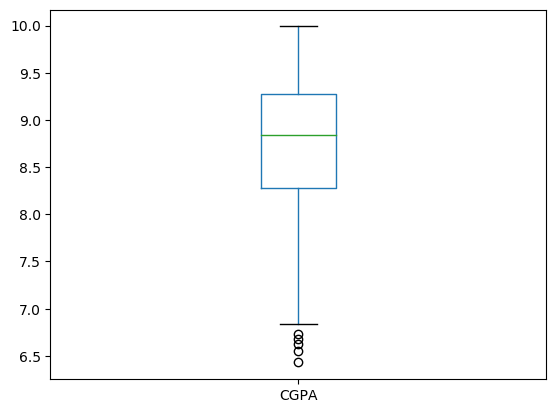

Overall CGPA MEAN 8.710340000000008

 



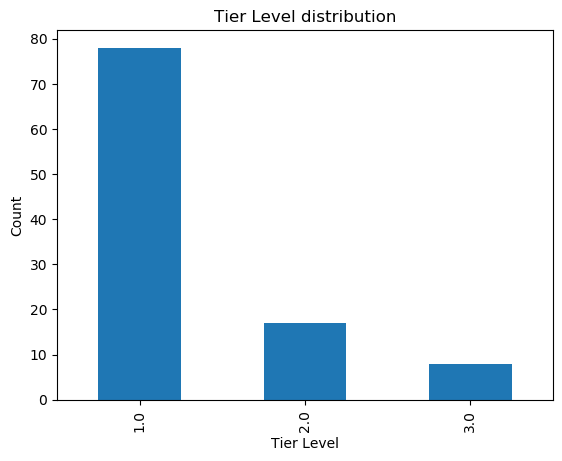

In [402]:
# ATTRIBUTE WISE ANALYSIS

b= BasicAttributeWiseEDA(df)
b.boxplotCGPA(df)
#b.hist12th(df)
#b.hist10th(df)
#b.barplotEmploymentType(df)
#b.pieTierCount(df)
#b.wordcloudCompany(df)
#b.pieScholarship(df)
b.tierLevelDistribution(df)
#b.companyDistribution(df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


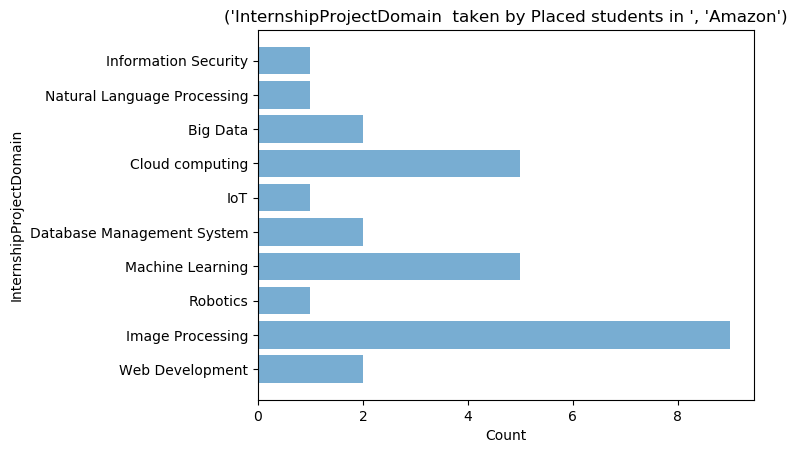

In [401]:
#PLACED STUDENT COUNT COLUMN WISE 

c= advancedColumnWiseCountEDA(df)
#c.projectDomain(df)
#c.researchDomain(df)
#c.tools(df)
#c.progLang(df)
#c.externalCertificates(df)
#c.externalCertificatesDomain(df)

#PLOT SHOWING DISTRIBUTION OF COUMN VALUES BASED ON ATTRIBUTE VALUE
#c.generalCode(df,'AwardsNLP')

#PLOT FOR TOP DOMAINS BASED ON COMPANY NAME:
c.companyDomainCount(df,"Amazon","InternshipProjectDomain")

Tier 1


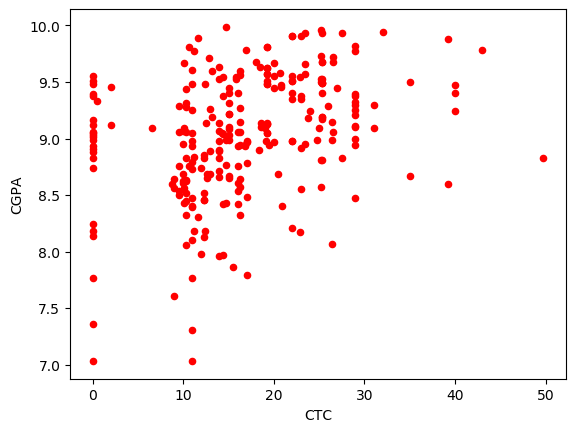

Tier 2


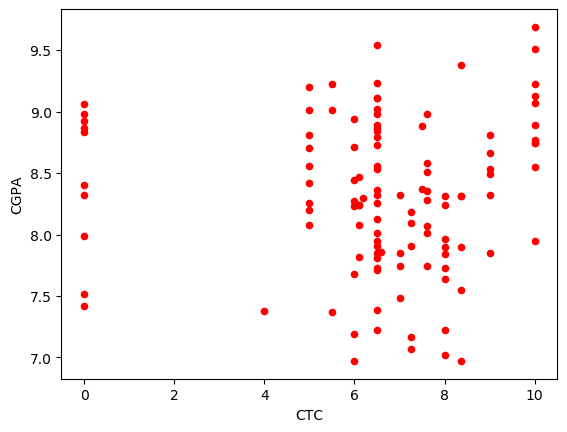

Tier 3


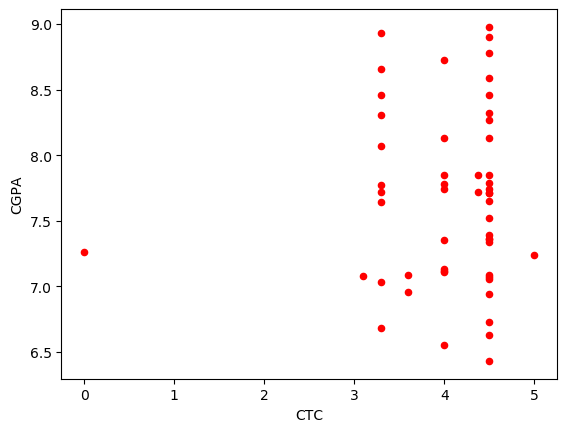

In [376]:
#TIER WISE STRATIFICATION

t=TierWiseStratificationEDA(data_main)
#t.cgpa(data_main)
#t.countTier()
t.CTC()
#t.histCGPA()
#t.histCTC()
#t.companyName("1")
#t.companyName("2")
#t.companyName("3")

#PLOT SHOWING DISTRIBUTION OF COUMN VALUES BASED ON TIER VALUE AND ATTRIBUTE
#t.columnWiseValueCount("ResearchDomain","1")

TOP ELECTIVE COURSES FOR A TIER:  1


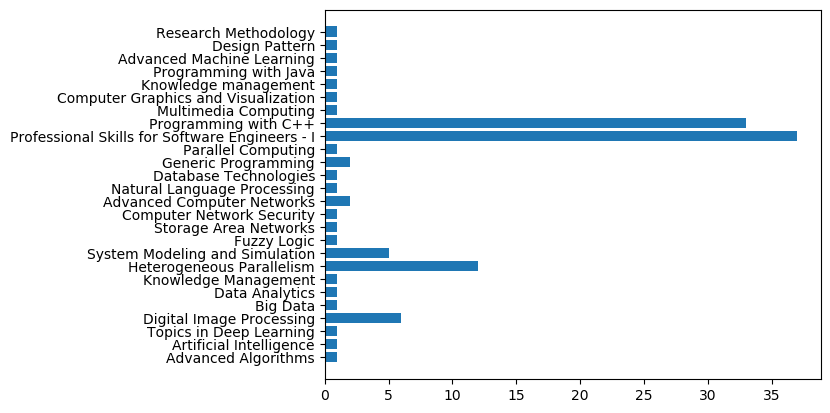

TOP OVERALL COURSES FOR A COMPANY:  Intuit


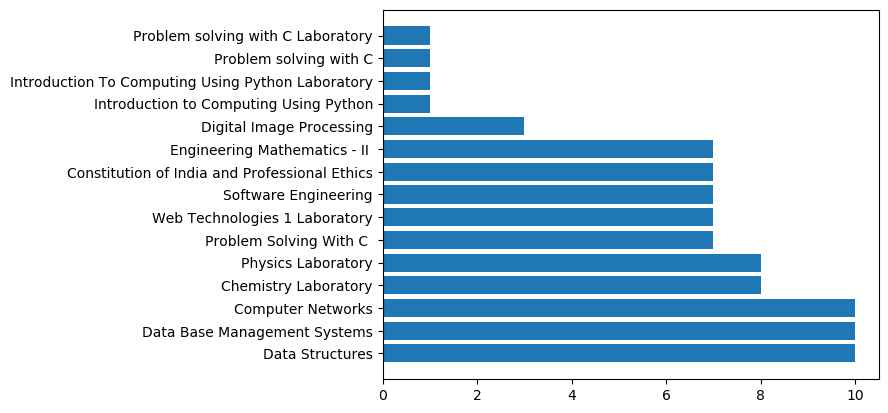

In [377]:
#COURSES AND ACEDEMIC BASED ANALYSIS
g=CourseGradesEDA(data_main)
#g.topNCombinationCourses(data_main,10)
count_elective=g.findUniqueCoursesElective(data_main)

#GET OVERALL TOP Elective Courses
#g.topElectiveCoursesOverall(data_main,count_elective)

#GET TOP 10 elective courses for a Company
#g.topElectiveCoursesCompanyWise(data_main,"Intuit")

#GET TOP 10 elctive course based on Tier 
g.topElectiveCoursesTierWise(data_main,1)

#GET TOP 15 OVERALL COURSES
g.topAllCoursesCompanyWise(data_main,"Intuit")

You are in the red! 
 The NoofInternships you have is lesser than the optimal range


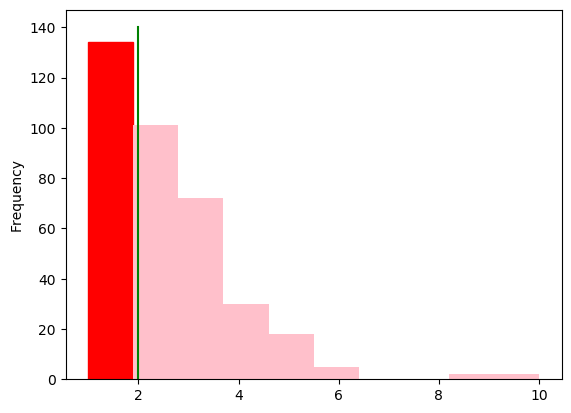

You are in the green! Great going. 
 The NoofInternships you have is greater than the optimal range


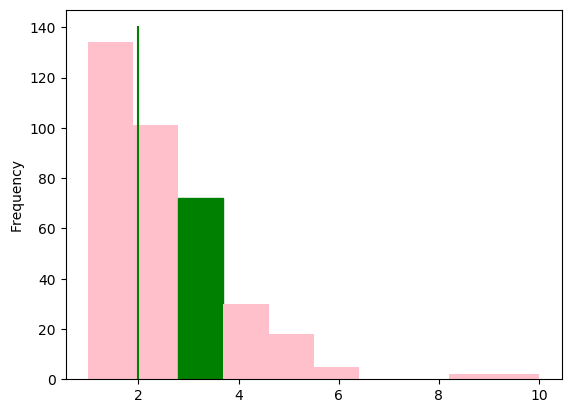

You are in the red! 
 The NoofProjects you have is lesser than the optimal range


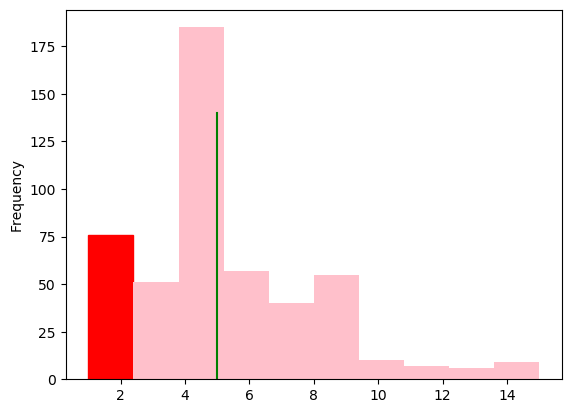

You are in the green! Great going. 
 The NoofProjects you have is greater than the optimal range


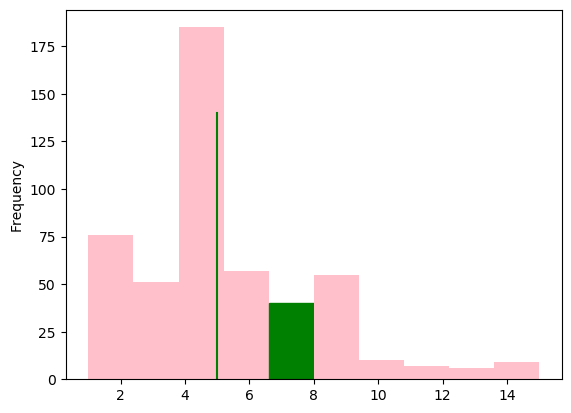

You are in the blue! You are safe. 
 Your CGPA seems to be within than the optimal range.


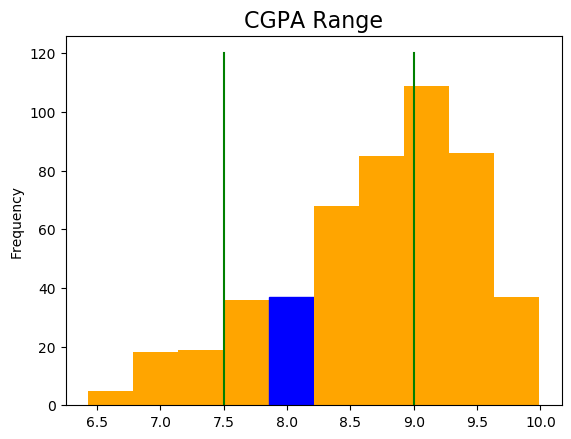

In [373]:
# USER BASED SKILL GAP ANALYSIS 

d=OptimalRange(df)
d.optimalRange(df,'NoofInternships',1,2)
d.optimalRange(df,'NoofInternships',3,2)
d.optimalRange(df,'NoofProjects',1,5)
d.optimalRange(df,'NoofProjects',7,5)
d.cgpaRange(df,7.5,9,8)
#d.userScatterCGPACTC(df,8.9,20)

In [387]:
df.columns

Index(['10thPercentage', '12thPercentage', 'AwardsNLP', 'Branch', 'CGPA',
       'CTC', 'CoCurricularActivities', 'CompanyNameNLP', 'CoreCourseGrade',
       'CoreCourseName', 'CourseGrade', 'CourseName', 'ElectiveCourseGrade',
       'ElectiveCourseName', 'EmploymentType', 'ExternalCertificatesDomain',
       'ExternalCertificatesKey', 'GeneralSkills', 'GitHubLink',
       'InternshipCompany', 'InternshipProjectDomain', 'LanguagesNLP',
       'LinkedInLink', 'MinorAttended', 'NoofInternships', 'NoofProjects',
       'NumberOfOffers', 'OtherDetails', 'ProgLanguages',
       'ProjectDetailDomain', 'PublicationNLP', 'ResearchDomain',
       'ScholarshipsNLP', 'SoftwareTools', 'Stipend(K)', 'TierLevel',
       'VolunteeringWork', 'WorkshopsDomain', 'WorkshopsOrg'],
      dtype='object')